In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
profile_df = pd.read_csv('Desktop/prolific_results_by_profile.csv')
trial_df = pd.read_csv('Desktop/prolific_results_by_trial.csv')
completed_df = pd.read_csv('Desktop/prolific_results_by_trial_completed.csv')

In [26]:
#np.unique(completed_df['intro_position'], return_counts=True)

In [50]:
np.unique(completed_df['stimulus_type'].values, return_counts=True)

(array(['correct_prior', 'counterfact', 'shape'], dtype=object),
 array([6468, 1764, 6468]))

In [ ]:
completed_df

In [59]:
df_intro = completed_df[
 (completed_df["task_type"] == "introspection") &
 (completed_df["intro_position"].isin(["first", "last"]))
].copy()

In [66]:
np.unique(completed_df['task_type'].values, return_counts=True)

(array(['color_judgment'], dtype=object), array([14700]))

# Color Thresholds

EXACT THRESHOLD POINTS

All Data:
  - First point where color > 50%: 40% colored (color prop: 0.568)
  - First point where color > 90%: 55% colored (color prop: 0.961)

Correct Prior:
  - First point where color > 50%: 40% colored (color prop: 0.616)
  - First point where color > 90%: 50% colored (color prop: 0.913)

Shape:
  - First point where color > 50%: 50% colored (color prop: 0.804)
  - First point where color > 90%: 55% colored (color prop: 0.963)

Counterfactual:
  - First point where color > 50%: 40% colored (color prop: 0.712)
  - First point where color > 90%: 50% colored (color prop: 0.918)


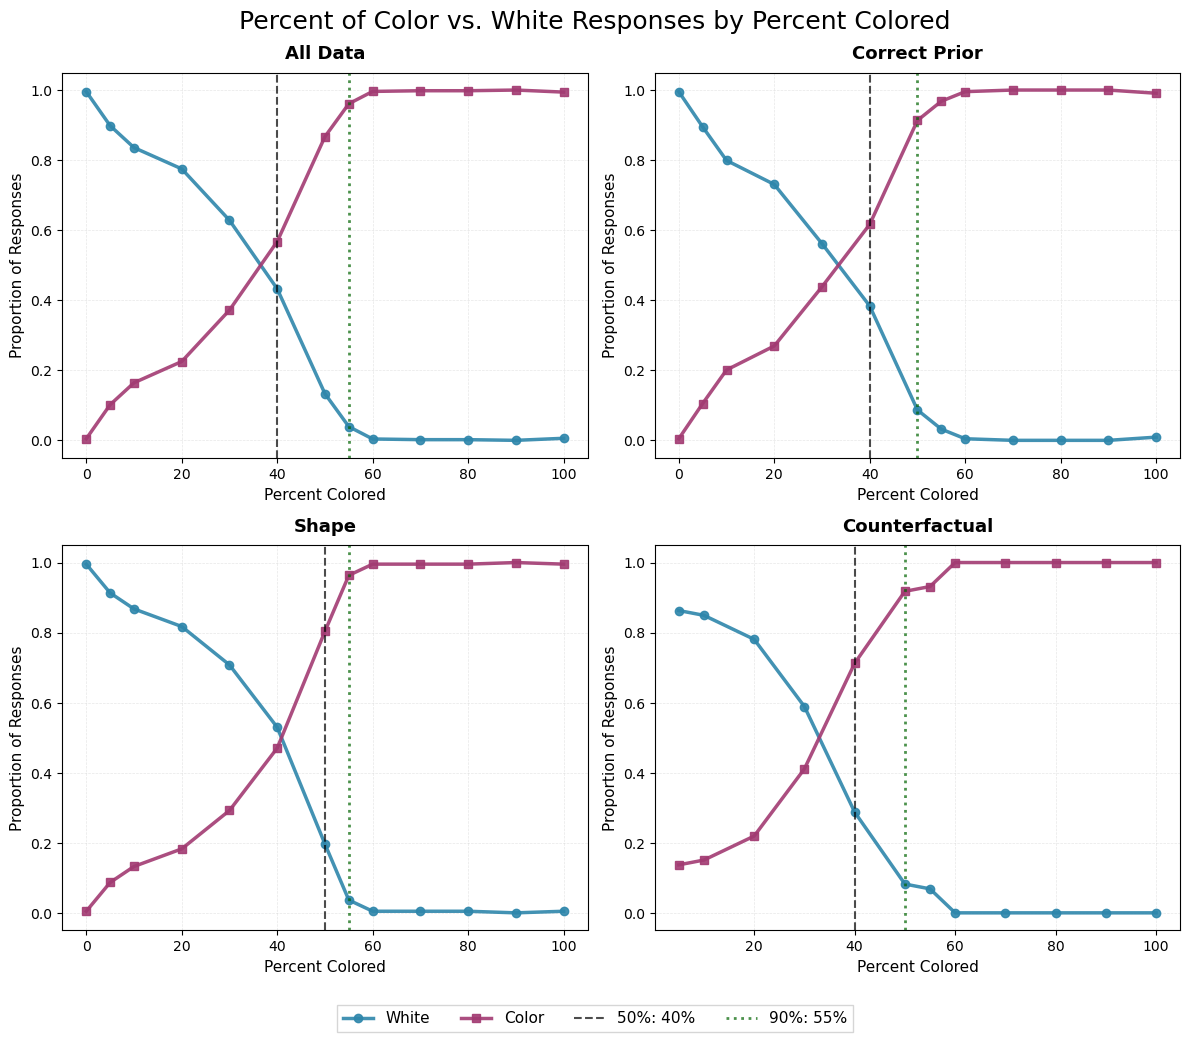

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Create binary indicators
df_plot = completed_df.copy()

df_plot = df_plot[df_plot['variant_region'] == 'FG']

# I WANT FIRST/LAST SPLITS TO BE ON THE SAME GRAPH WITH RELATED COLORS. 
df_plot = df_plot[df_plot['intro_position'] == 'first']
#df_plot = df_plot[df_plot['intro_position'] == 'last']

df_plot['white_count'] = (df_plot['response_label'] == 'white').astype(int)
df_plot['color_count'] = (df_plot['response_label'] != 'white').astype(int)

# Define stimulus types for subplots
stimulus_types = ['correct_prior', 'shape', 'counterfact']
stimulus_labels = {
    'correct_prior': 'Correct Prior',
    'shape': 'Shape',
    'counterfact': 'Counterfactual'
}

# Function to find exact crossover point (50%)
def find_crossover_exact(grouped):
    """Find the first percent_colored where color_count exceeds 0.5"""
    above_50 = grouped[grouped['color_count'] > 0.5]
    if len(above_50) > 0:
        return above_50['percent_colored'].iloc[0]
    return None

# Function to find exact 90% threshold
def find_90_percent_exact(grouped):
    """Find the first percent_colored where color_count exceeds 0.9"""
    above_90 = grouped[grouped['color_count'] > 0.9]
    if len(above_90) > 0:
        return above_90['percent_colored'].iloc[0]
    return None

# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Define colors for publication quality
colors = {
    'white': '#2E86AB',  # Professional blue
    'color': '#A23B72'   # Professional magenta
}

print("=" * 70)
print("EXACT THRESHOLD POINTS")
print("=" * 70)

# Plot for all data (subplot 1)
grouped_all = (
    df_plot
    .groupby('percent_colored')[['white_count', 'color_count']]
    .mean()
    .reset_index()
    .sort_values('percent_colored')
)

crossover_all = find_crossover_exact(grouped_all)
threshold_90_all = find_90_percent_exact(grouped_all)

print(f"\nAll Data:")
if crossover_all is not None:
    color_val = grouped_all[grouped_all['percent_colored'] == crossover_all]['color_count'].iloc[0]
    print(f"  - First point where color > 50%: {crossover_all:.0f}% colored (color prop: {color_val:.3f})")
else:
    print(f"  - First point where color > 50%: Not reached")
    
if threshold_90_all is not None:
    color_val = grouped_all[grouped_all['percent_colored'] == threshold_90_all]['color_count'].iloc[0]
    print(f"  - First point where color > 90%: {threshold_90_all:.0f}% colored (color prop: {color_val:.3f})")
else:
    print(f"  - First point where color > 90%: Not reached")

axes[0].plot(grouped_all['percent_colored'], grouped_all['white_count'], 
             color=colors['white'], linewidth=2.5, marker='o', markersize=6, 
             label='White', alpha=0.9)
axes[0].plot(grouped_all['percent_colored'], grouped_all['color_count'], 
             color=colors['color'], linewidth=2.5, marker='s', markersize=6, 
             label='Color', alpha=0.9)
if crossover_all is not None:
    axes[0].axvline(x=crossover_all, color='black', linestyle='--', 
                    linewidth=1.5, alpha=0.7, label=f'50%: {crossover_all:.0f}%')
if threshold_90_all is not None:
    axes[0].axvline(x=threshold_90_all, color='darkgreen', linestyle=':', 
                    linewidth=2, alpha=0.7, label=f'90%: {threshold_90_all:.0f}%')
axes[0].set_title('All Data', fontsize=13, fontweight='bold', pad=10)
axes[0].grid(alpha=0.3, linestyle='--', linewidth=0.5)
axes[0].set_xlabel('Percent Colored', fontsize=11)
axes[0].set_ylabel('Proportion of Responses', fontsize=11)

# Plot for each stimulus type (subplots 2-4)
for idx, stim_type in enumerate(stimulus_types, start=1):
    df_subset = df_plot[df_plot['stimulus_type'] == stim_type]
    
    grouped = (
        df_subset
        .groupby('percent_colored')[['white_count', 'color_count']]
        .mean()
        .reset_index()
        .sort_values('percent_colored')
    )
    
    crossover = find_crossover_exact(grouped)
    threshold_90 = find_90_percent_exact(grouped)
    
    print(f"\n{stimulus_labels[stim_type]}:")
    if crossover is not None:
        color_val = grouped[grouped['percent_colored'] == crossover]['color_count'].iloc[0]
        print(f"  - First point where color > 50%: {crossover:.0f}% colored (color prop: {color_val:.3f})")
    else:
        print(f"  - First point where color > 50%: Not reached")
        
    if threshold_90 is not None:
        color_val = grouped[grouped['percent_colored'] == threshold_90]['color_count'].iloc[0]
        print(f"  - First point where color > 90%: {threshold_90:.0f}% colored (color prop: {color_val:.3f})")
    else:
        print(f"  - First point where color > 90%: Not reached")
    
    axes[idx].plot(grouped['percent_colored'], grouped['white_count'], 
                   color=colors['white'], linewidth=2.5, marker='o', 
                   markersize=6, label='White', alpha=0.9)
    axes[idx].plot(grouped['percent_colored'], grouped['color_count'], 
                   color=colors['color'], linewidth=2.5, marker='s', 
                   markersize=6, label='Color', alpha=0.9)
    if crossover is not None:
        axes[idx].axvline(x=crossover, color='black', linestyle='--', 
                         linewidth=1.5, alpha=0.7, label=f'50%: {crossover:.0f}%')
    if threshold_90 is not None:
        axes[idx].axvline(x=threshold_90, color='darkgreen', linestyle=':', 
                         linewidth=2, alpha=0.7, label=f'90%: {threshold_90:.0f}%')
    axes[idx].set_title(stimulus_labels[stim_type], fontsize=13, 
                        fontweight='bold', pad=10)
    axes[idx].grid(alpha=0.3, linestyle='--', linewidth=0.5)
    axes[idx].set_xlabel('Percent Colored', fontsize=11)
    axes[idx].set_ylabel('Proportion of Responses', fontsize=11)

print("=" * 70)

# Set consistent y-axis limits across all subplots
y_min = min([ax.get_ylim()[0] for ax in axes])
y_max = max([ax.get_ylim()[1] for ax in axes])
for ax in axes:
    ax.set_ylim([y_min, y_max])

# Add single legend outside the plot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05),
           ncol=4, frameon=True, fontsize=11, 
           fancybox=False, shadow=False)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle("Percent of Color vs. White Responses by Percent Colored", fontsize=18)
plt.savefig('color_threshold.png')
plt.show()

EXACT THRESHOLD POINTS

All Data (First):
  - First point where color > 50%: 40% (prop=0.568)
  - First point where color > 90%: 55% (prop=0.961)

All Data (Last):
  - First point where color > 50%: 30% (prop=0.556)
  - First point where color > 90%: 50% (prop=0.950)

Correct Prior (First):
  - First point where color > 50%: 40% (prop=0.616)
  - First point where color > 90%: 50% (prop=0.913)

Correct Prior (Last):
  - First point where color > 50%: 30% (prop=0.599)
  - First point where color > 90%: 50% (prop=0.982)

Shape (First):
  - First point where color > 50%: 50% (prop=0.804)
  - First point where color > 90%: 55% (prop=0.963)

Shape (Last):
  - First point where color > 50%: 40% (prop=0.671)
  - First point where color > 90%: 50% (prop=0.919)

Counterfactual (First):
  - First point where color > 50%: 40% (prop=0.712)
  - First point where color > 90%: 50% (prop=0.918)

Counterfactual (Last):
  - First point where color > 50%: 30% (prop=0.622)
  - First point where color > 90%

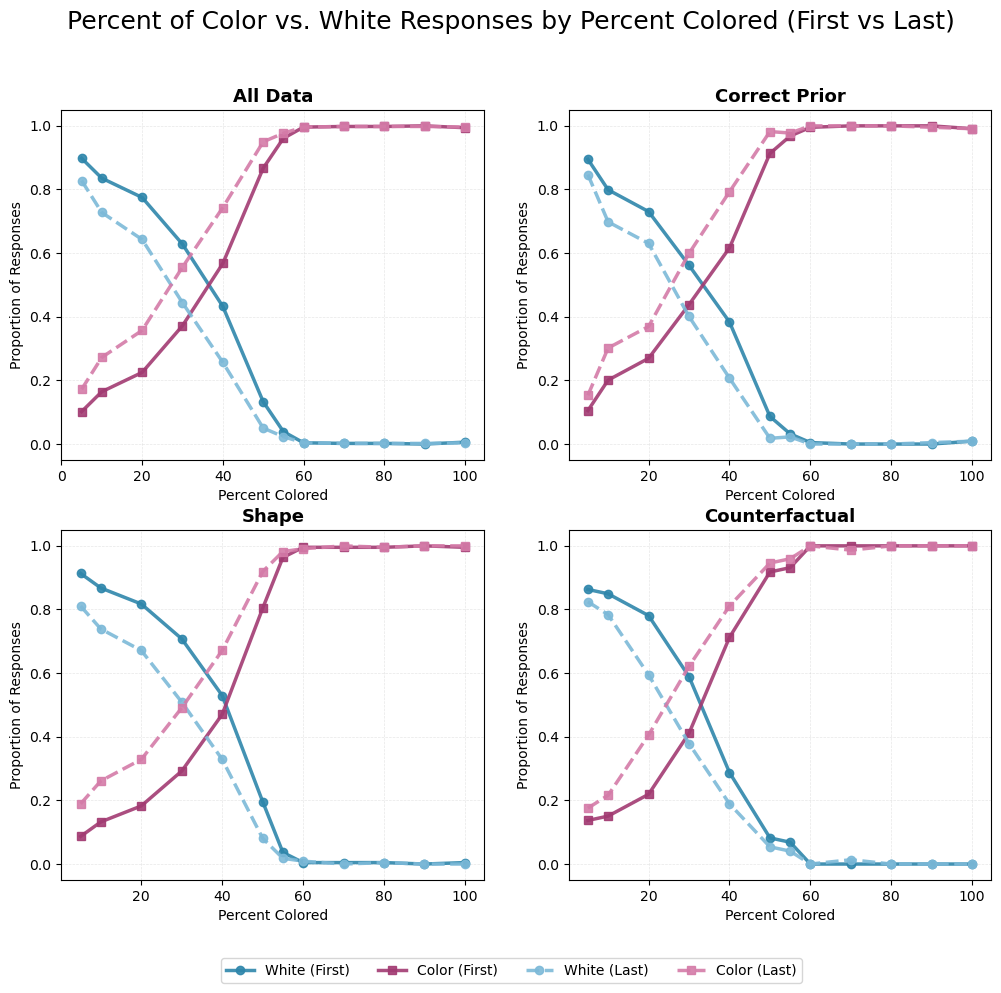

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Create binary indicators
df_plot = completed_df.copy()
df_plot = df_plot[df_plot['variant_region'] == 'FG']
df_plot = df_plot[df_plot['percent_colored'] != 0.0]

df_plot['white_count'] = (df_plot['response_label'] == 'white').astype(int)
df_plot['color_count'] = (df_plot['response_label'] != 'white').astype(int)

# Define stimulus types
stimulus_types = ['correct_prior', 'shape', 'counterfact']
stimulus_labels = {
    'correct_prior': 'Correct Prior',
    'shape': 'Shape',
    'counterfact': 'Counterfactual'
}

# Threshold helpers
def find_crossover_exact(grouped):
    above_50 = grouped[grouped['color_count'] > 0.5]
    return above_50['percent_colored'].iloc[0] if len(above_50) > 0 else None

def find_90_percent_exact(grouped):
    above_90 = grouped[grouped['color_count'] > 0.9]
    return above_90['percent_colored'].iloc[0] if len(above_90) > 0 else None

# Figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Colors
colors_first = {'white': '#2E86AB', 'color': '#A23B72'}
colors_last  = {'white': '#7CB9D8', 'color': '#D47BA8'}

print("=" * 70)
print("EXACT THRESHOLD POINTS")
print("=" * 70)

# =========================
# 1. ALL DATA (keep x=0)
# =========================
for position, colors in [('first', colors_first), ('last', colors_last)]:
    df_subset = df_plot[df_plot['intro_position'] == position]

    grouped = (
        df_subset
        .groupby('percent_colored')[['white_count', 'color_count']]
        .mean()
        .reset_index()
        .sort_values('percent_colored')
    )

    crossover = find_crossover_exact(grouped)
    threshold_90 = find_90_percent_exact(grouped)

    print(f"\nAll Data ({position.capitalize()}):")

    if crossover is not None:
        val = grouped[grouped['percent_colored'] == crossover]['color_count'].iloc[0]
        print(f"  - First point where color > 50%: {crossover:.0f}% (prop={val:.3f})")
    else:
        print("  - First point where color > 50%: Not reached")

    if threshold_90 is not None:
        val = grouped[grouped['percent_colored'] == threshold_90]['color_count'].iloc[0]
        print(f"  - First point where color > 90%: {threshold_90:.0f}% (prop={val:.3f})")
    else:
        print("  - First point where color > 90%: Not reached")

    linestyle = '-' if position == 'first' else '--'

    axes[0].plot(grouped['percent_colored'], grouped['white_count'],
                 color=colors['white'], linewidth=2.5,
                 marker='o', markersize=6,
                 label=f'White ({position.capitalize()})',
                 alpha=0.9, linestyle=linestyle)

    axes[0].plot(grouped['percent_colored'], grouped['color_count'],
                 color=colors['color'], linewidth=2.5,
                 marker='s', markersize=6,
                 label=f'Color ({position.capitalize()})',
                 alpha=0.9, linestyle=linestyle)

axes[0].set_title('All Data', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Percent Colored')
axes[0].set_ylabel('Proportion of Responses')
axes[0].grid(alpha=0.3, linestyle='--', linewidth=0.5)
axes[0].set_xlim(left=0)   # Explicitly keep zero


# ======================================
# 2–4. STIMULUS-SPECIFIC SUBPLOTS
# ======================================
for idx, stim_type in enumerate(stimulus_types, start=1):

    min_positive_vals = []

    for position, colors in [('first', colors_first), ('last', colors_last)]:

        df_subset = df_plot[
            (df_plot['stimulus_type'] == stim_type) &
            (df_plot['intro_position'] == position)
        ]

        grouped = (
            df_subset
            .groupby('percent_colored')[['white_count', 'color_count']]
            .mean()
            .reset_index()
            .sort_values('percent_colored')
        )

        if len(grouped) == 0:
            continue

        # Store smallest non-zero percent_colored
        positive_vals = grouped[grouped['percent_colored'] > 0]['percent_colored']
        if len(positive_vals) > 0:
            min_positive_vals.append(positive_vals.min())

        crossover = find_crossover_exact(grouped)
        threshold_90 = find_90_percent_exact(grouped)

        print(f"\n{stimulus_labels[stim_type]} ({position.capitalize()}):")

        if crossover is not None:
            val = grouped[grouped['percent_colored'] == crossover]['color_count'].iloc[0]
            print(f"  - First point where color > 50%: {crossover:.0f}% (prop={val:.3f})")
        else:
            print("  - First point where color > 50%: Not reached")

        if threshold_90 is not None:
            val = grouped[grouped['percent_colored'] == threshold_90]['color_count'].iloc[0]
            print(f"  - First point where color > 90%: {threshold_90:.0f}% (prop={val:.3f})")
        else:
            print("  - First point where color > 90%: Not reached")

        linestyle = '-' if position == 'first' else '--'

        axes[idx].plot(grouped['percent_colored'], grouped['white_count'],
                       color=colors['white'], linewidth=2.5,
                       marker='o', markersize=6,
                       label=f'White ({position.capitalize()})',
                       alpha=0.9, linestyle=linestyle)

        axes[idx].plot(grouped['percent_colored'], grouped['color_count'],
                       color=colors['color'], linewidth=2.5,
                       marker='s', markersize=6,
                       label=f'Color ({position.capitalize()})',
                       alpha=0.9, linestyle=linestyle)

    axes[idx].set_title(stimulus_labels[stim_type], fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Percent Colored')
    axes[idx].set_ylabel('Proportion of Responses')
    axes[idx].grid(alpha=0.3, linestyle='--', linewidth=0.5)


print("=" * 70)

# =========================
# Match Y-limits
# =========================
y_min = min(ax.get_ylim()[0] for ax in axes)
y_max = max(ax.get_ylim()[1] for ax in axes)

for ax in axes:
    ax.set_ylim([y_min, y_max])

# =========================
# Legend + layout
# =========================
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels,
           loc='lower center',
           bbox_to_anchor=(0.5, 0.0),
           ncol=4,
           frameon=True)

plt.suptitle("Percent of Color vs. White Responses by Percent Colored (First vs Last)", fontsize=18)
plt.savefig('color_threshold.png', bbox_inches='tight', dpi=300)
plt.show()



In [41]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

df_test = completed_df.copy()
df_test = df_test[df_test['variant_region'] == 'FG']

df_test['color_response'] = (df_test['response_label'] != 'white').astype(int)

df_test['intro_position'] = df_test['intro_position'].astype('category')
df_test['intro_position'] = df_test['intro_position'].cat.reorder_categories(['first', 'last'])

splits = {
    "All": df_test,
    "Counterfactual": df_test[df_test['stimulus_type'] == 'counterfact'],
    "Correct Prior": df_test[df_test['stimulus_type'] == 'correct_prior'],
    "Shape": df_test[df_test['stimulus_type'] == 'shape']
}

print("=" * 70)
print("LOGISTIC REGRESSION (Adjusted for percent_colored)")
print("=" * 70)

for name, data in splits.items():
    if len(data) == 0:
        continue

    model = smf.logit(
        "color_response ~ C(intro_position) + percent_colored",
        data=data
    ).fit(disp=0)

    coef = model.params['C(intro_position)[T.last]']
    pval = model.pvalues['C(intro_position)[T.last]']
    odds_ratio = np.exp(coef)

    print(f"\n{name}")
    print(f"  Adjusted log-odds (Last vs First): {coef:.4f}")
    print(f"  Adjusted odds ratio: {odds_ratio:.4f}")
    print(f"  p-value: {pval:.6f}")

print("=" * 70)


LOGISTIC REGRESSION (Adjusted for percent_colored)

All
  Adjusted log-odds (Last vs First): 0.7176
  Adjusted odds ratio: 2.0495
  p-value: 0.000000

Counterfactual
  Adjusted log-odds (Last vs First): 0.6306
  Adjusted odds ratio: 1.8787
  p-value: 0.000146

Correct Prior
  Adjusted log-odds (Last vs First): 0.6334
  Adjusted odds ratio: 1.8841
  p-value: 0.000000

Shape
  Adjusted log-odds (Last vs First): 0.8377
  Adjusted odds ratio: 2.3110
  p-value: 0.000000


In [48]:
from statsmodels.stats.proportion import proportions_ztest

print("=" * 70)
print("PER-PERCENT-COLORED SIGNIFICANCE TESTS")
print("=" * 70)

for split_name, data in splits.items():

    print(f"\n===== {split_name} =====")

    for pct in sorted(data['percent_colored'].unique()):

        subset = data[data['percent_colored'] == pct]

        first = subset[subset['intro_position'] == 'first']
        last = subset[subset['intro_position'] == 'last']

        if len(first) == 0 or len(last) == 0:
            continue

        count = np.array([
            first['color_response'].sum(),
            last['color_response'].sum()
        ])

        nobs = np.array([
            len(first),
            len(last)
        ])

        stat, pval = proportions_ztest(count, nobs)

        prop_first = count[0] / nobs[0]
        prop_last = count[1] / nobs[1]

        print(f"\nPercent Colored: {pct}")
        print(f"  First  proportion: {prop_first:.3f} (n={nobs[0]})")
        print(f"  Last   proportion: {prop_last:.3f} (n={nobs[1]})")
        print(f"  z-stat: {stat:.3f}")
        print(f"  p-value: {pval:.6f}")


PER-PERCENT-COLORED SIGNIFICANCE TESTS

===== All =====

Percent Colored: 0.0
  First  proportion: 0.005 (n=438)
  Last   proportion: 0.005 (n=444)
  z-stat: 0.014
  p-value: 0.989120

Percent Colored: 5.0
  First  proportion: 0.102 (n=511)
  Last   proportion: 0.172 (n=518)
  z-stat: -3.267
  p-value: 0.001086

Percent Colored: 10.0
  First  proportion: 0.164 (n=511)
  Last   proportion: 0.272 (n=518)
  z-stat: -4.184
  p-value: 0.000029

Percent Colored: 20.0
  First  proportion: 0.225 (n=511)
  Last   proportion: 0.357 (n=518)
  z-stat: -4.662
  p-value: 0.000003

Percent Colored: 30.0
  First  proportion: 0.372 (n=511)
  Last   proportion: 0.556 (n=518)
  z-stat: -5.922
  p-value: 0.000000

Percent Colored: 40.0
  First  proportion: 0.568 (n=511)
  Last   proportion: 0.743 (n=518)
  z-stat: -5.933
  p-value: 0.000000

Percent Colored: 50.0
  First  proportion: 0.867 (n=511)
  Last   proportion: 0.950 (n=518)
  z-stat: -4.614
  p-value: 0.000004

Percent Colored: 55.0
  First  propo

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


# Confidence

AVERAGE INITIAL CERTAINTY BY PERCENT COLORED

All Data (First):
  - Average certainty range: 6.875 to 9.810

Correct Prior (First):
  - Average certainty range: 6.932 to 9.813

Shape (First):
  - Average certainty range: 6.849 to 9.817

Counterfactual (First):
  - Average certainty range: 6.781 to 9.781

All Data (Last):
  - Average certainty range: 7.562 to 9.851

Correct Prior (Last):
  - Average certainty range: 7.653 to 9.806

Shape (Last):
  - Average certainty range: 7.550 to 9.896

Counterfactual (Last):
  - Average certainty range: 7.324 to 9.851


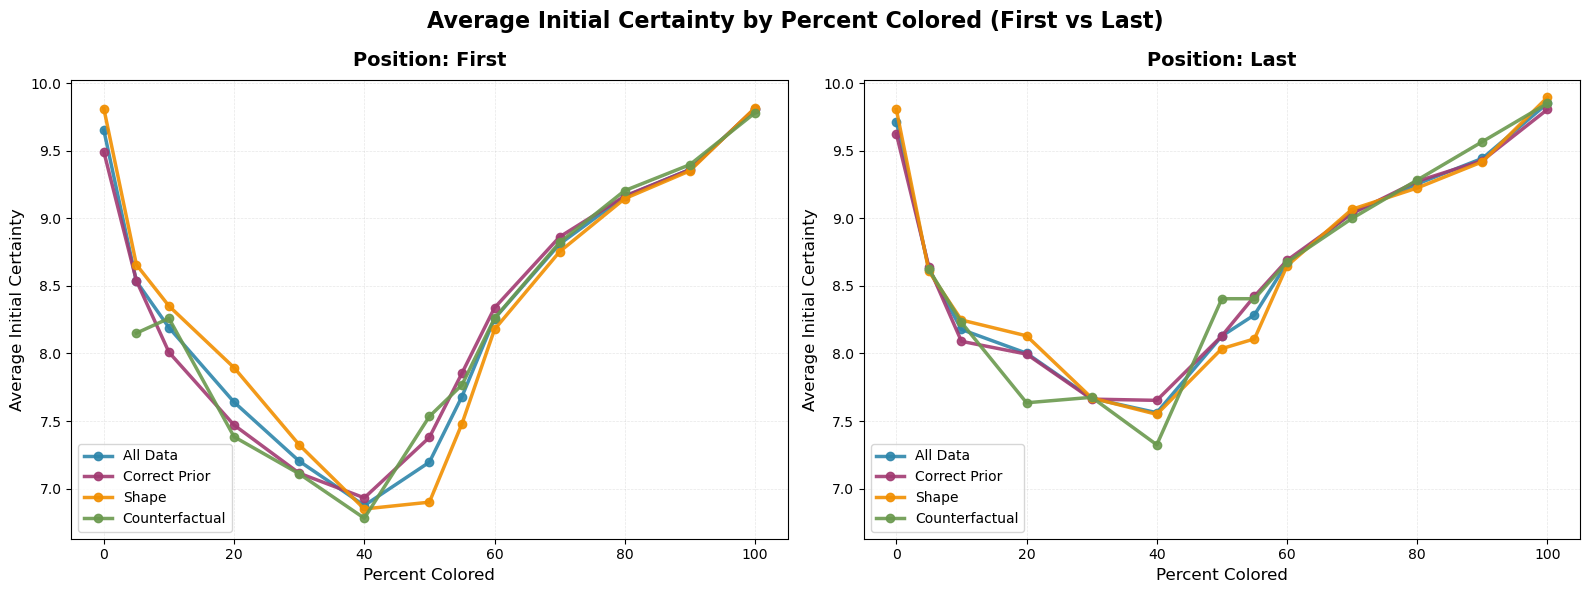

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Create dataframe for plotting
df_plot = completed_df.copy()
df_plot = df_plot[df_plot['variant_region'] == 'FG']

# Define stimulus types
stimulus_types = ['correct_prior', 'shape', 'counterfact']
stimulus_labels = {
    'correct_prior': 'Correct Prior',
    'shape': 'Shape',
    'counterfact': 'Counterfactual'
}

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Define colors for each line
colors = {
    'all': '#2E86AB',           # Professional blue
    'correct_prior': '#A23B72',  # Professional magenta
    'shape': '#F18F01',          # Orange
    'counterfact': '#6A994E'     # Green
}

print("=" * 70)
print("AVERAGE INITIAL CERTAINTY BY PERCENT COLORED")
print("=" * 70)

# Process both positions
for position, ax in [('first', ax1), ('last', ax2)]:
    df_subset = df_plot[df_plot['intro_position'] == position]
    
    # Plot for all data
    grouped_all = (
        df_subset
        .groupby('percent_colored')['initial_certainty']
        .mean()
        .reset_index()
        .sort_values('percent_colored')
    )
    
    print(f"\nAll Data ({position.capitalize()}):")
    print(f"  - Average certainty range: {grouped_all['initial_certainty'].min():.3f} to {grouped_all['initial_certainty'].max():.3f}")
    
    ax.plot(grouped_all['percent_colored'], grouped_all['initial_certainty'], 
            color=colors['all'], linewidth=2.5, marker='o', markersize=6, 
            alpha=0.9, label='All Data')
    
    # Plot for each stimulus type
    for stim_type in stimulus_types:
        df_stim = df_subset[df_subset['stimulus_type'] == stim_type]
        
        grouped = (
            df_stim
            .groupby('percent_colored')['initial_certainty']
            .mean()
            .reset_index()
            .sort_values('percent_colored')
        )
        
        print(f"\n{stimulus_labels[stim_type]} ({position.capitalize()}):")
        print(f"  - Average certainty range: {grouped['initial_certainty'].min():.3f} to {grouped['initial_certainty'].max():.3f}")
        
        ax.plot(grouped['percent_colored'], grouped['initial_certainty'], 
                color=colors[stim_type], linewidth=2.5, marker='o', 
                markersize=6, alpha=0.9, label=stimulus_labels[stim_type])
    
    # Formatting for this subplot
    ax.set_title(f'Position: {position.capitalize()}', fontsize=14, fontweight='bold', pad=10)
    ax.grid(alpha=0.3, linestyle='--', linewidth=0.5)
    ax.set_xlabel('Percent Colored', fontsize=12)
    ax.set_ylabel('Average Initial Certainty', fontsize=12)
    ax.legend(loc='best', fontsize=10, frameon=True)

print("=" * 70)

# Set consistent y-axis limits
y_min = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim([y_min, y_max])
ax2.set_ylim([y_min, y_max])

plt.suptitle('Average Initial Certainty by Percent Colored (First vs Last)', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('initial_certainty.png', dpi=300, bbox_inches='tight')
plt.show()

AVERAGE INITIAL CERTAINTY BY PERCENT COLORED

First Position:
  - Average certainty range: 6.875 to 9.810

Last Position:
  - Average certainty range: 7.562 to 9.851


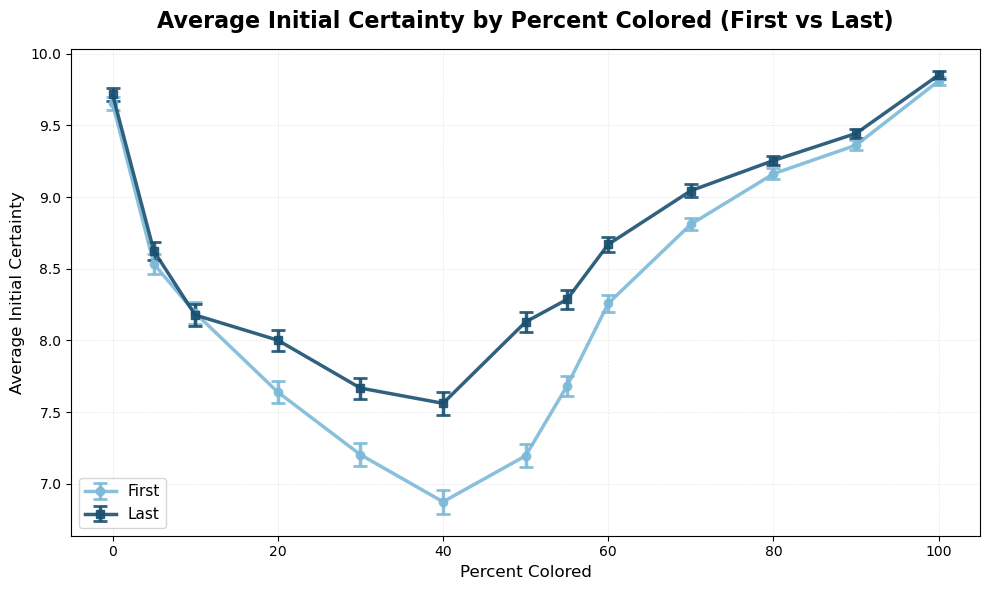

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Create dataframe for plotting
df_plot = completed_df.copy()
df_plot = df_plot[df_plot['variant_region'] == 'FG']

# Create single figure
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Define colors - first lighter, last darker
color_first = '#7CB9D8'    # Professional blue (lighter)
color_last = '#1A5070'     # Professional blue (darker)

print("=" * 70)
print("AVERAGE INITIAL CERTAINTY BY PERCENT COLORED")
print("=" * 70)

# Plot for first position
df_first = df_plot[df_plot['intro_position'] == 'first']
grouped_first = (
    df_first
    .groupby('percent_colored')['initial_certainty']
    .agg(['mean', 'sem'])  # Get mean and standard error
    .reset_index()
    .sort_values('percent_colored')
)

print(f"\nFirst Position:")
print(f"  - Average certainty range: {grouped_first['mean'].min():.3f} to {grouped_first['mean'].max():.3f}")

ax.errorbar(grouped_first['percent_colored'], grouped_first['mean'], 
            yerr=grouped_first['sem'],
            color=color_first, linewidth=2.5, marker='o', markersize=6, 
            alpha=0.9, label='First', capsize=5, capthick=2)

# Plot for last position
df_last = df_plot[df_plot['intro_position'] == 'last']
grouped_last = (
    df_last
    .groupby('percent_colored')['initial_certainty']
    .agg(['mean', 'sem'])  # Get mean and standard error
    .reset_index()
    .sort_values('percent_colored')
)

print(f"\nLast Position:")
print(f"  - Average certainty range: {grouped_last['mean'].min():.3f} to {grouped_last['mean'].max():.3f}")

ax.errorbar(grouped_last['percent_colored'], grouped_last['mean'], 
            yerr=grouped_last['sem'],
            color=color_last, linewidth=2.5, marker='s', markersize=6, 
            alpha=0.9, label='Last', capsize=5, capthick=2)

print("=" * 70)

# Formatting
ax.set_title('Average Initial Certainty by Percent Colored (First vs Last)', 
             fontsize=16, fontweight='bold', pad=15)
ax.grid(alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_xlabel('Percent Colored', fontsize=12)
ax.set_ylabel('Average Initial Certainty', fontsize=12)
ax.legend(loc='best', fontsize=11, frameon=True)

plt.tight_layout()
plt.savefig('certainty_threshold.png', dpi=300, bbox_inches='tight')
plt.show()